In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [25]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("total training data: %d" %len(x_train))
print("total testing data: %d" %len(x_test))
print("dimensions of image:",(x_train[0]).shape)

total training data: 60000
total testing data: 10000
dimensions of image: (28, 28)


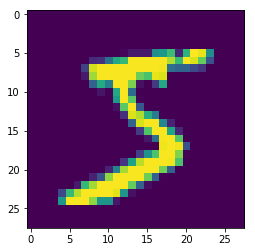

In [26]:
plt.imshow(x_train[0])

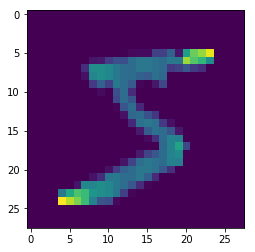

In [27]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

plt.imshow(x_train[0])

In [28]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(rate=.1))

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(rate=.1))

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 7s 113us/step - loss: 0.2571 - acc: 0.9251
Epoch 2/3
60000/60000 [==============================] - 6s 105us/step - loss: 0.1065 - acc: 0.9673
Epoch 3/3
60000/60000 [==============================] - 6s 105us/step - loss: 0.0731 - acc: 0.9771 1s -


In [29]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print("\nval loss:", val_loss, "\nval_acc:", val_acc)

10000/10000 [==============================] - 0s 49us/step

val loss: 0.08797984192483127 
val_acc: 0.9729


In [30]:
model.save("mnist.model")

In [31]:
new_model = tf.keras.models.load_model("mnist.model")

In [36]:
predict = new_model.predict([x_test])

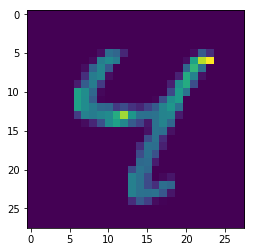

In [39]:
plt.imshow(x_test[6])

In [41]:
print("Predicted Number:", np.argmax(predict[6]))

Predicted Number: 4
